In [35]:
import numpy as num

#TODO: provare nel branch principale il dataset che riprende tutto in tre dimensione x y z


# import openpyxl
# 
# try:
#     workbook = openpyxl.load_workbook("dataset/Graphs_August_ADWR_cleaned.xlsx")
#     sheet = workbook.active
#     # Fai qualcosa con il tuo foglio Excel
# except FileNotFoundError:
#     print("Il file non è stato trovato.")
# except Exception as e:
#     print(f"Si è verificato un errore: {e}")
# 

import pandas as pd
from pandas import DataFrame

try:
# Carica il tuo file XLSX
    xlsx_file = 'dataset/Data.xlsx'  # Sostituisci con il percorso del tuo file

# Leggi i dati dal file XLSX e crea un DataFrame
    df: DataFrame = pd.read_excel(xlsx_file)

# Ora hai un DataFrame con tutti i dati dal tuo file XLSX che puoi utilizzare per l'analisi.
except FileNotFoundError as e:
    print("Il file non è stato trovato.")
# except Exception as e:
    print(f"Si è verificato un errore: {e}")
    
k2_max = df['k_m2'].max()
k2_min = df['k_m2'].min()
print(df)


    Porosity     SSA      Ech  Tortuosity          k_m2
0      0.137   5.065  -25.849      2.0340  1.473350e-12
1      0.147   5.253  -31.002      2.6650  2.254724e-12
2      0.131   4.697  -20.047      2.1090  9.543177e-12
3      0.115   5.583  -50.613      4.1830  9.664920e-13
4      0.139   7.447 -136.737      2.5950  9.180783e-13
5      0.115   5.311  -32.907      4.1010  1.435774e-12
6      0.134   6.990 -115.218      2.7740  4.010302e-13
7      0.138   7.132 -110.411      2.7790  3.937021e-12
8      0.116   5.290  -39.748      3.8680  1.933907e-12
9      0.020   0.791   -3.948      3.1000  3.021802e-13
10     0.020   0.806   -2.017      2.9000  3.190436e-13
11     0.273   7.721 -102.424      1.7170  5.516051e-11
12     0.250   6.870  -76.478      1.3530  3.822390e-11
13     0.265   7.560  -95.050      1.5730  5.275967e-11
14     0.250   7.353 -152.126      1.3400  2.009570e-11
15     0.281   8.363 -258.282      1.3720  1.319490e-10
16     0.297   9.123 -362.849      1.6750  8.289

In [36]:
df.describe()


,Porosity,SSA,Ech,Tortuosity,k_m2
count,50.00000,50.000000,50.000000,50.000000,5.000000e+01
mean,0.12048,6.253340,-108.942340,3.206306,8.414681e-12
std,0.06590,2.550559,75.644798,0.869853,2.414520e-11
min,0.02000,0.791000,-362.849000,1.340000,0.000000e+00
25%,0.07750,4.747000,-159.575500,2.783000,3.063961e-13
50%,0.11500,5.865500,-112.814500,3.340000,5.497365e-13
75%,0.13700,7.990250,-44.076250,3.851000,1.385659e-12
max,0.29700,10.300000,-2.017000,4.459000,1.319490e-10


In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
from numpy import real


#Standardizza i dati con lo scaler
scaler = MinMaxScaler()  

scaled_data = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

df_scaled.describe()

,Porosity,SSA,Ech,Tortuosity,k_m2
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.362744,0.574439,0.703670,0.598367,0.063772
std,0.237907,0.268226,0.209640,0.278889,0.182989
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.207581,0.416027,0.563347,0.462648,0.002322
50%,0.342960,0.533652,0.692939,0.641231,0.004166
75%,0.422383,0.757099,0.883438,0.805066,0.010501
max,1.000000,1.000000,1.000000,1.000000,1.000000


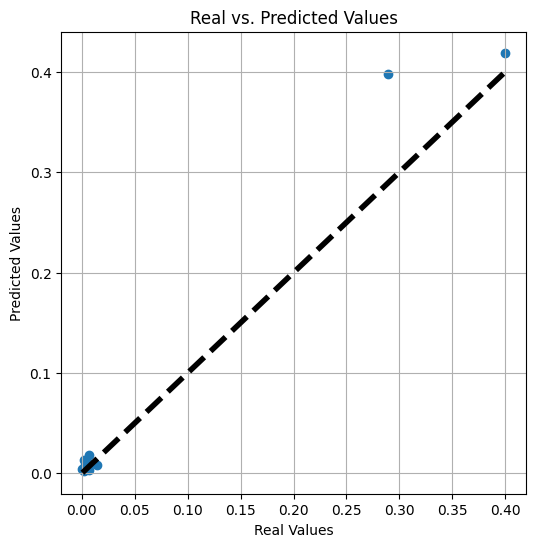

In [38]:
# In questo esempio, consideriamo k sia la colonna target
features_X = df_scaled.drop(['k_m2'], axis=1)  # Colonne features
targets_X = df_scaled[['k_m2']]  # Colonne target

# Suddivisione del dataset in set di addestramento e test

#TODO provare con 0.7 - 30  o  0.7 - 20
X_train, X_test, y_train, y_test = train_test_split(features_X, targets_X, test_size=0.3, random_state=42)
# 
# classifiers = {
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     'Support Vector Machine': SVC(),
# }  # Lista dei modelli di classificazione

regressor =  RandomForestRegressor()
regressor. fit(X_train, y_train.values.ravel())
predict_k = regressor. predict(X_test)
mse_k = mean_squared_error(y_test, predict_k)

# Real vs. Predicted Values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, predict_k)
# inserisci una linea bisettrice che rappresenta landamento ottimale dei valori
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.grid(True)
plt.show()
#Itera sulla lista dei modelli da provare
# for name, classifier in classifiers.items():
#         #Addestro il modello
#     classifier.fit(features_X_train, targets_X_train)
#     #Calcolo l'accuratezza del modello
#     predict = classifier.predict(features_X_test)
#         
#     #Stampo i risultati
#     print(f"Modello: {name}")
# print(f'Classification Report: \n {classification_report(targets_X_test, predict)}\n')KNeighborsClassifier()

(array([13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([0.0006431 , 0.02060339, 0.04056369, 0.06052398, 0.08048428,
        0.10044457, 0.12040487, 0.14036516, 0.16032545, 0.18028575,
        0.20024604, 0.22020634, 0.24016663, 0.26012693, 0.28008722,
        0.30004752, 0.32000781, 0.3399681 , 0.3599284 , 0.37988869,
        0.39984899]),
 <BarContainer object of 20 artists>)

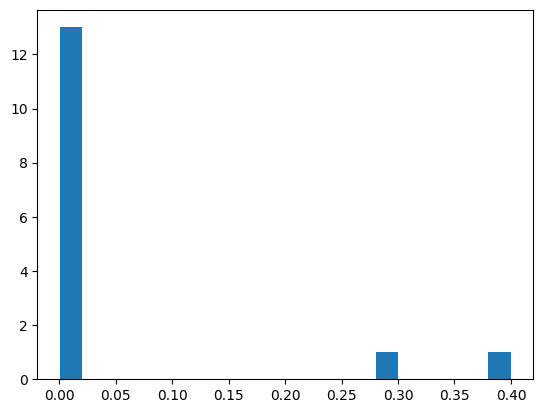

In [39]:
plt.hist(y_test, bins=20)

Valore reale: 0.39984898710865563 - Valore predetto: 0.41897365862492314 
Errore di previsione 0.01912467151626751 

Valore reale: 0.0006431000613873541 - Valore predetto: 0.003880626089625539 
Errore di previsione 0.003237526028238185 

Valore reale: 0.003225113566605279 - Valore predetto: 0.00825785930018416 
Errore di previsione 0.005032745733578881 

Valore reale: 0.004064100675260896 - Valore predetto: 0.0041574645303867445 
Errore di previsione 9.336385512584856e-05 

Valore reale: 0.0025698895027624308 - Valore predetto: 0.013358307341927557 
Errore di previsione 0.010788417839165126 

Valore reale: 0.006631430325352977 - Valore predetto: 0.0034669857581338267 
Errore di previsione 0.0031644445672191503 

Valore reale: 0.0022233701657458564 - Valore predetto: 0.003659933087783921 
Errore di previsione 0.0014365629220380646 

Valore reale: 0.004115107427869859 - Valore predetto: 0.009246801473296512 
Errore di previsione 0.005131694045426653 

Valore reale: 0.0013393124616329036 

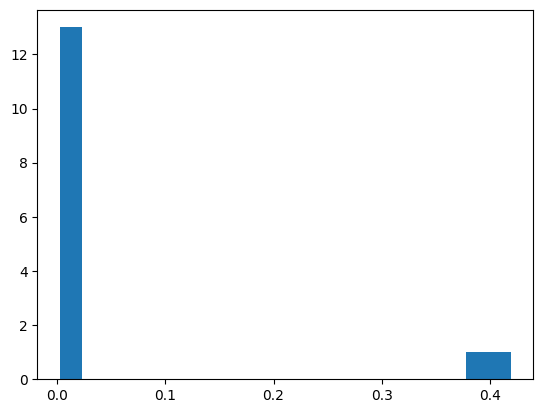

In [40]:
plt.hist(predict_k, bins=20)

y_ravel = y_test.values.ravel()

errori_list = []

for a in range(0, len(y_test) - 1):
    errori_list.append(abs(y_ravel[a] - predict_k[a]))
    print(f"Valore reale: {y_ravel[a]} - Valore predetto: {predict_k[a]} \n"
         f"Errore di previsione { abs(y_ravel[a] - predict_k[a]) } \n")

In [41]:
# Supponiamo che predict_k sia il tuo array di previsioni standardizzate
# e che scaler sia un'istanza di MinMaxScaler già addestrata sul tuo dataset originale

errori_List = np.array(errori_list)
print("Dimensioni di errori_array:", errori_List.shape)

# De-standardizzazione dei residui
residui_originali = []
print(y_test)
for i in range(len(errori_List)):
    residui_originali.append(
        errori_List[i] * (k2_max - k2_min) + k2_min
    )

print("Residui originali: \n", residui_originali)
# Ora residui_originali contiene i residui de-standardizzati


Dimensioni di errori_array: (14,)
        k_m2
13  0.399849
39  0.000643
30  0.003225
45  0.004064
17  0.002570
48  0.006631
26  0.002223
25  0.004115
32  0.001339
19  0.002570
12  0.289687
4   0.006958
37  0.004318
8   0.014656
3   0.007325
Residui originali: 
 [2.523481281899982e-12, 4.271883219000003e-13, 6.640657667999998e-13, 1.2319267320000592e-14, 1.4235209454599993e-12, 4.175452961999997e-13, 1.895530410000006e-13, 6.771218976000015e-13, 2.293291845000002e-13, 3.4607601539999997e-14, 1.4228075241900003e-11, 1.525406636700002e-12, 8.689010130000038e-14, 8.531853686999992e-13]


In [46]:
#### test iperparametri più veloce...meno valori da provare....codice funzionante e veloce!!!

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import time

# Definisci gli iperparametri da cercare
param_grid = {
    'n_estimators': [50],
    'criterion': ['absolute_error', 'poisson', 'squared_error', 'friedman_mse'],
    'max_features': [0.1, 1],
    'n_jobs': [-1],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


# Crea un oggetto GridSearchCV per la ricerca degli iperparametri con cross-validation
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Lista per tenere traccia del tempo di esecuzione di ciascun set di iperparametri
execution_times = []

# Definisci il tempo massimo di esecuzione in secondi (300 secondi = 5 minuti)
max_execution_time = 300

start_time = time.time()

# Esegui la ricerca degli iperparametri
grid_search.fit(X_train, y_train.values.ravel())

end_time = time.time()
training_time = end_time - start_time
# iteration = 0

# Itera attraverso i parametri iperparametrici
# for params in ParameterGrid(param_grid):
#     # Misura il tempo di inizio dell'allenamento
#     start_time = time.time()
# 
#     # Esegui la ricerca degli iperparametri
#     grid_search.fit(X_train, y_train)
# 
#     # Calcola il tempo di fine dell'allenamento
#     end_time = time.time()
# 
#     # Calcola il tempo totale di addestramento
#     training_time = end_time - start_time
#     execution_times.append(training_time)
# 
#     # Incrementa il contatore delle iterazioni
#     iteration += 1
# 
#     # Verifica se il tempo massimo è stato superato
#     if sum(execution_times) + (training_time * (len(ParameterGrid(param_grid)) - iteration)) > max_execution_time:
#         print(f"Interrotto dopo {iteration} iterazioni (tempo limite raggiunto)")
#         break
#     
#     # Stampa l'avanzamento
#     print(f"Iterazione {iteration}/{len(ParameterGrid(param_grid))}, Tempo impiegato: {training_time:.2f} secondi")

# Trova il miglior modello
best_model = grid_search.best_estimator_

# Valuta il modello sul set di test
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_bestModel = best_model.score(X_test, y_test)

print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", -grid_search.best_score_)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2_bestModel)
print("Training Time (seconds):", training_time)




Best Parameters: {'criterion': 'absolute_error', 'max_features': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50, 'n_jobs': -1}
Best MSE Score: 0.024267389223930687
Mean Squared Error: 0.0002504336532936847
Root Mean Squared Error: 0.015825095680395893
R^2 Score: 0.9818284079417591
Training Time (seconds): 56.254456996917725


In [47]:
from sklearn.metrics import r2_score

#Alleno il modello sulla porzione di training del dataset
best_model.fit(X_train, y_train.values.ravel())

# Calcola l'MSE e R2
predictions = best_model.predict(X_test)
mse_rf = mean_squared_error(y_test, predictions)
r2_rf = r2_score(y_test, predictions)

print(f'MSE sul set di test: {mse_rf}')
print(f'R2 sul set di test: {r2_rf}')


MSE sul set di test: 0.0001068222946309793
R2 sul set di test: 0.9922489204816135


[array([0.02885767]), array([-0.00601252]), array([-0.00266146]), array([0.00019679]), array([-0.0041874]), array([5.62713567e-05]), array([-0.00262897]), array([-0.00837273]), array([-0.01212046]), array([-0.00115383]), array([0.01660727]), array([-0.01326944]), array([-0.00236239]), array([0.00453274]), array([-0.00234567])]
--------------------
[0.37099132 0.00665562 0.00588657 0.00386732 0.00675728 0.00657516
 0.00485234 0.01248784 0.01345977 0.00372372 0.27307965 0.02022727
 0.00668009 0.01012374 0.00967041]
--------------------
[0.37099132 0.00665562 0.00588657 0.00386732 0.00675728 0.00657516
 0.00485234 0.01248784 0.01345977 0.00372372 0.27307965 0.02022727
 0.00668009 0.01012374 0.00967041]
--------------------


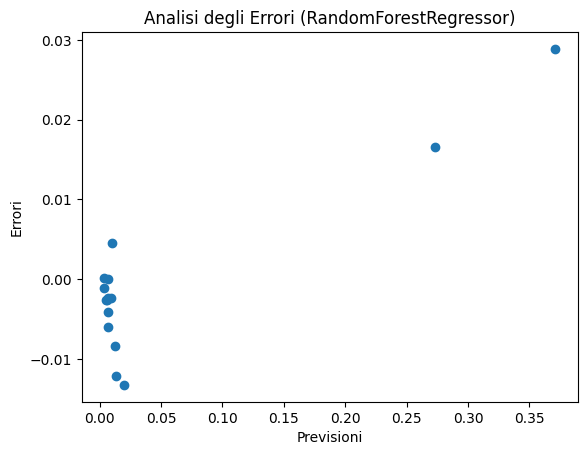

In [49]:
# Assicurati che siano array NumPy o serie Pandas
y_test = np.array(y_test)
predictions_rf = np.array(predictions)
# Analisi degli errori
errore = []
for i in range(len(y_test)):
   errore.append(y_test[i] - predictions_rf[i])
print(errore)
print("--------------------")
# Supponendo che errore sia la tua lista di array
errore_concatenato = np.concatenate(errore)

# Creare un DataFrame pandas con una colonna chiamata 'Errore'
df_errore = pd.DataFrame({'Errore': errore_concatenato})

# Grafico degli errori
plt.scatter(predictions_rf, df_errore)
plt.xlabel('Previsioni')
plt.ylabel('Errori')
plt.title('Analisi degli Errori (RandomForestRegressor)')
plt.show()


In [50]:
#Codice che mi serve solo per controllare se l'allenamento procede correttamente.
#Devo controllare che gli errori non si discostino troppo dai valori reali
#Ora controllo dopo averlo allenato col modello migliore utilizzando gli iperparametri migliori

errorilist2 = []

for a in range(0, len(y_test) - 1):
    errorilist2.append(abs(y_ravel[a] - predictions[a]))
    print(f"Valore reale: {y_ravel[a]} - Valore predetto: {predictions[a]} \n"
         f"Errore di previsione { abs(y_ravel[a] - predictions[a]) } \n")
    
erroriList2 = np.array(errorilist2)

# De-standardizzazione dei residui
residui_originali_2 = []
print(y_test)
for i in range(len(erroriList2)):
    residui_originali_2.append(
        erroriList2[i] * (k2_max - k2_min) + k2_min
    )

print("Residui originali: \n", residui_originali_2)

Valore reale: 0.39984898710865563 - Valore predetto: 0.37099131553100057 
Errore di previsione 0.028857671577655064 

Valore reale: 0.0006431000613873541 - Valore predetto: 0.006655617249846534 
Errore di previsione 0.00601251718845918 

Valore reale: 0.003225113566605279 - Valore predetto: 0.0058865686924493565 
Errore di previsione 0.0026614551258440774 

Valore reale: 0.004064100675260896 - Valore predetto: 0.003867315531000615 
Errore di previsione 0.0001967851442602809 

Valore reale: 0.0025698895027624308 - Valore predetto: 0.006757284960098218 
Errore di previsione 0.004187395457335787 

Valore reale: 0.006631430325352977 - Valore predetto: 0.006575158968692453 
Errore di previsione 5.627135666052413e-05 

Valore reale: 0.0022233701657458564 - Valore predetto: 0.004852340024554941 
Errore di previsione 0.0026289698588090843 

Valore reale: 0.004115107427869859 - Valore predetto: 0.012487840883977908 
Errore di previsione 0.00837273345610805 

Valore reale: 0.0013393124616329036 

Media MSE sulla LOOCV: 0.008408371952519


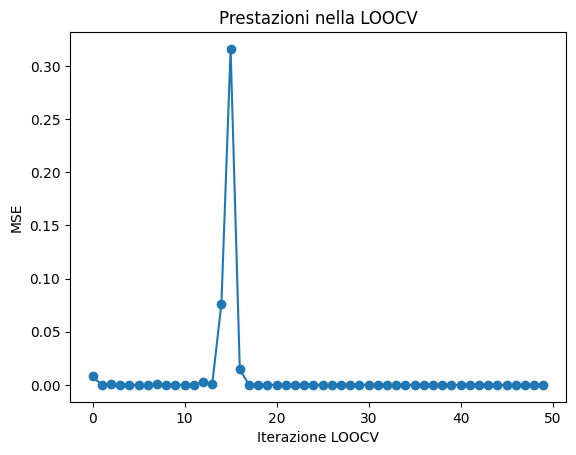

In [70]:
# from sklearn.ensemble import RandomForestRegressor
# import numpy as np
# import matplotlib.pyplot as plt
# 
# # Supponiamo che X sia il tuo insieme di dati e y sia l'etichetta associata
# # Sostituisci X e y con i tuoi dati effettivi
# 
# # Numero totale di dati
# num_dati = len(df_scaled)
# # Inizializza il regressore
# regressor = RandomForestRegressor()
# 
# # Inizializza un array per tenere traccia delle prestazioni durante l'apprendimento
# performance = []
# 
# # Ciclo attraverso le iterazioni
# for i in range(num_dati):
#     # Seleziona un singolo dato da aggiungere al set di addestramento
#     indice_train = i % num_dati
# 
#     # Aggiorna il set di addestramento
#     X_train = df_scaled[:indice_train + 1]
#     y_train = df_scaled['k_m2'][:indice_train + 1]
# 
#     # Addestra il regressore
#     regressor.fit(X_train, y_train)
# 
#     # Valuta le prestazioni sul set di addestramento
#     y_pred_train = regressor.predict(X_train)
#     mse_train = np.mean((y_train - y_pred_train)**2)
# 
#     performance.append(mse_train)
# 
# # Visualizza come le prestazioni cambiano con l'apprendimento
# plt.plot(performance, marker='o')
# plt.xlabel('Numero di iterazioni')
# plt.ylabel('MSE sul set di addestramento')
# plt.title('Apprendimento cumulativo con RandomForestRegressor')
# plt.show()


from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Supponiamo che X sia il tuo insieme di dati e y sia l'etichetta associata
# Sostituisci X e y con i tuoi dati effettivi



# Inizializza lo schema LOOCV
loo = LeaveOneOut()

# Inizializza un array per tenere traccia delle prestazioni
performance = []

# Ciclo attraverso le iterazioni della LOOCV
for train_index, test_index in loo.split(df_scaled):
    X_train, X_test = df_scaled.drop('k_m2', axis=1).iloc[train_index], df_scaled.drop('k_m2', axis=1).iloc[test_index]
    y_train, y_test = df_scaled['k_m2'].iloc[train_index], df_scaled['k_m2'].iloc[test_index]

    # Addestra il regressore
    regressor.fit(X_train, y_train)

    # Valuta le prestazioni sul set di test
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    performance.append(mse)

# Media degli errori quadratici medi ottenuti in ciascuna iterazione
media_performance = np.mean(performance)
print(f"Media MSE sulla LOOCV: {media_performance}")


# Plot delle prestazioni in ciascuna iterazione
plt.plot(performance, marker='o')
plt.xlabel('Iterazione LOOCV')
plt.ylabel('MSE')
plt.title('Prestazioni nella LOOCV')
plt.show()

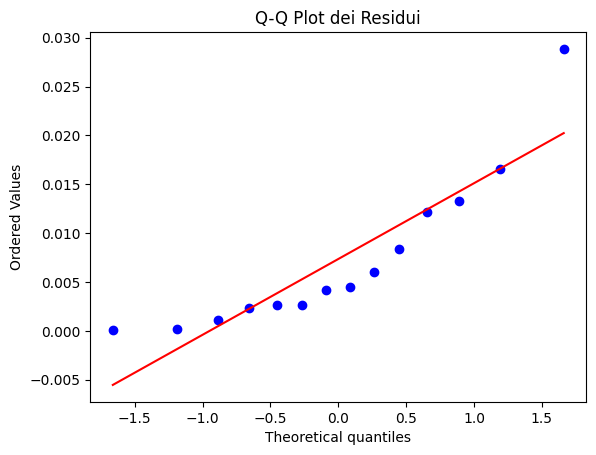

In [71]:
# ANALISI DEI RESIDUI

#TODO -> Sto provando a completare l'analisi degli errori prima di passare al salvataggio del modello per poi poterlo testare su un dataswet di prova. Prima di quel punto è necessario committare il lavoro effettuato. Creare dunque un database capace di poter essere testabile sul modello appena creato. L'analisi degli errori attualmente è stata svolta per il primo step empirico che considera la differenza tra y e y_pred... gli altri metodi ancora non vengono testati per problemi con 'df_errore' che non viene riconosciuto come un array.. 
#QQ plot
from scipy import stats

stats.probplot(erroriList2, plot=plt)
plt.title('Q-Q Plot dei Residui')
plt.show()


ValueError: x and y must be the same size

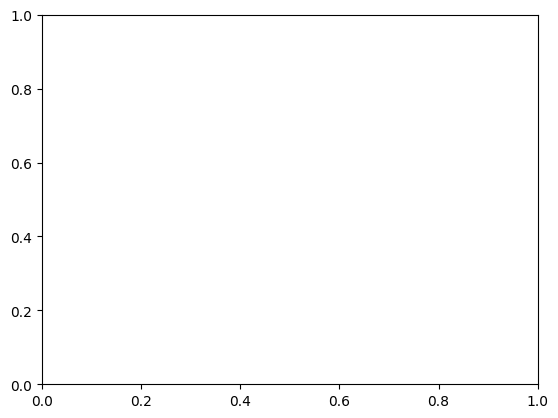

In [57]:
#Scatter plot dei residui rispetto alle features indipendenti
for col in X_test.columns:
    plt.scatter(X_test[col], df_errore['Errore'])
    plt.xlabel(col)
    plt.ylabel('Residui')
    plt.title(f'Scatter Plot Residui vs {col}')
    plt.show()

In [15]:
#Questo codice aiuta ad identificare i valori anomali nel dataset. 

# Aggiungi i residui al DataFrame originale
df_with_residui = X_test.copy()
df_with_residui['Residui'] = errore

# Osservazioni sottostimate (residui negativi)
sottostimate = df_with_residui[df_with_residui['Residui'] < 0]

# Osservazioni sovrastimate (residui positivi)
sovrastimate = df_with_residui[df_with_residui['Residui'] > 0]

# Visualizza le prime righe delle osservazioni sottostimate
print("Osservazioni sottostimate:")
print(sottostimate.head())

# Visualizza le prime righe delle osservazioni sovrastimate
print("\nOsservazioni sovrastimate:")
print(sovrastimate.head())


Osservazioni sottostimate:
    Porosity       SSA       Ech  Tortuosity                   Residui
39  0.274368  0.527605  0.815992    0.739340  [-0.0036099316758747705]
30  0.422383  1.000000  0.443032    0.466496  [-0.0006751529772866796]
17  0.198556  0.416027  0.643358    0.410709   [-0.009588826531614482]
26  0.418773  0.996530  0.445617    0.560115  [-0.0016701424186617553]
25  0.462094  0.706594  0.668411    0.788714     [-0.0055032518723143]

Osservazioni sovrastimate:
    Porosity       SSA       Ech  Tortuosity                  Residui
13  0.884477  0.711852  0.742171    0.074703   [0.020574082504603908]
45  0.191336  0.341150  0.896736    1.000000  [0.0006372427378759974]
48  0.075812  0.162898  0.953654    0.725874   [0.003297974683855125]
8   0.346570  0.473131  0.895433    0.810516   [0.003656597532228356]


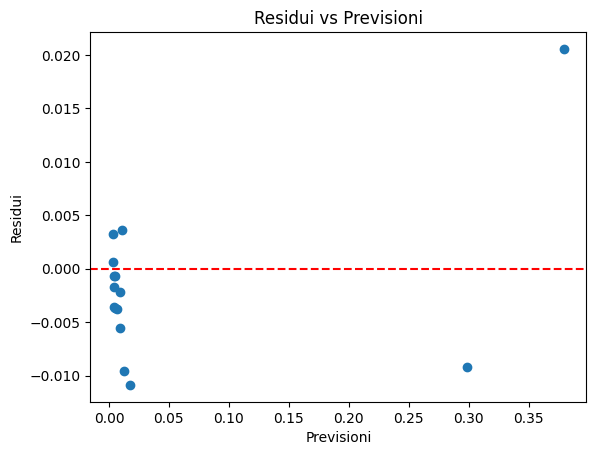

In [16]:
#Grafico dei residui vs valori predetti

plt.scatter(predictions_rf, df_errore['Errore'])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Previsioni')
plt.ylabel('Residui')
plt.title('Residui vs Previsioni')
plt.show()

#In teoria qui andrei a cercare la situazione ideale in cuii miei dati si dispongono casualmente intorno alla linea rossa tratteggiata senza alcun ordine particolare ( y = 0 ). I dati al di sopra della linea rossa indicano che il modello sottostima i valori, mentre i dati al di sotto della linea rossa indicano che il modello sovrastima i valori. Inoltre, se i dati sono disposti in modo non casuale, potrebbe essere necessario utilizzare un modello diverso.

In [17]:
# salvare il modello allenato di XGBoost
import pickle

# Salva il modello su disco
with open('RandomForestRegressor_Permeability.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print("Modello salvato come 'RandomForestRegressor_Permeability.pkl'")
##################################################################

# Carica il modello salvato
import pickle
with open('RandomForestRegressor_Permeability.pkl', 'rb') as model_file:
    loaded_model_RFR_Perm = pickle.load(model_file)

Modello salvato come 'RandomForestRegressor_Permeability.pkl'


In [31]:
from sklearn import gaussian_process
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt


#Standardizza i dati con lo scaler
scaler = StandardScaler()  

scaled_data = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

# In questo esempio, consideriamo k sia la colonna target
features_X = df_scaled.drop(['k_m2'], axis=1)  # Colonne features
targets_X = df_scaled[['k_m2']]  # Colonne target


# Suddivisione del dataset in set di addestramento e test

#TODO provare con 0.7 - 30  o  0.7 - 20
X_train, X_test, y_train, y_test = train_test_split(features_X, targets_X, test_size=0.3, random_state=42)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import time
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Lista degli algoritmi da testare
algorithms = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree Regressor", DecisionTreeRegressor()),
    ("Random Forest Regressor", RandomForestRegressor()),
    ("SVR", SVR()),
    ("Gaussian Process Regressor", GaussianProcessRegressor()),
    ("MLP Regressor", MLPRegressor()),
    ("XGBoost Regressor", XGBRegressor()),
    ("LGBM Regressor", LGBMRegressor()),
]

# Definisci un dizionario per raccogliere i risultati
results_dict = {
    "Model": [],
    "Training RMSE": [],
    "Training MSE": [],
    "Training R^2": [],
    "Test RMSE": [],
    "Test MSE": [],
    "Test R^2": [],
    "Training Time (s)": []
}

# Ciclo attraverso gli algoritmi e addestra/valuta ciascuno
for name, model in tqdm(algorithms, desc="Testing Algorithms"):
    
    # Misura il tempo di inizio dell'allenamento
    start_time = time.time()

    # Addestramento del modello
    model.fit(X_train, y_train)

    # Calcola il tempo di fine dell'allenamento
    end_time = time.time()
    
    # Calcola il tempo totale di addestramento
    training_time = end_time - start_time   

    # Valutazione del modello sui dati di addestramento
    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = model.score(X_train, y_train)

    # Valutazione del modello sui dati di test
    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = model.score(X_test, y_test)

    # Aggiungi i risultati al dizionario
    results_dict["Model"].append(name)
    results_dict["Training RMSE"].append(rmse_train)
    results_dict["Training MSE"].append(mse_train)
    results_dict["Training R^2"].append(r2_train)
    results_dict["Test RMSE"].append(rmse_test)
    results_dict["Test MSE"].append(mse_test)
    results_dict["Test R^2"].append(r2_test)
    results_dict["Training Time (s)"].append(training_time)

# Crea un DataFrame da results_dict
risultati_alle_mod_K = pd.DataFrame(results_dict)
# Esporta il DataFrame in un file Excel
risultati_alle_mod_K.to_excel('risultati_alle_mod_K.xlsx', index=False)

Testing Algorithms:  40%|████      | 4/10 [00:00<00:00, 35.49it/s]C:\Users\loris\Desktop\Python Workspace\FirstTryMiller\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\loris\Desktop\Python Workspace\FirstTryMiller\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\loris\Desktop\Python Workspace\FirstTryMiller\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 35, number of used features: 0
[LightGBM] [Info] Start training from score 0.032555
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

C:\Users\loris\Desktop\Python Workspace\FirstTryMiller\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\loris\Desktop\Python Workspace\FirstTryMiller\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\loris\Desktop\Python Workspace\FirstTryMiller\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\loris\Desktop\Python Workspace\FirstTryMiller\venv\Lib\site-packages\sklearn\base.

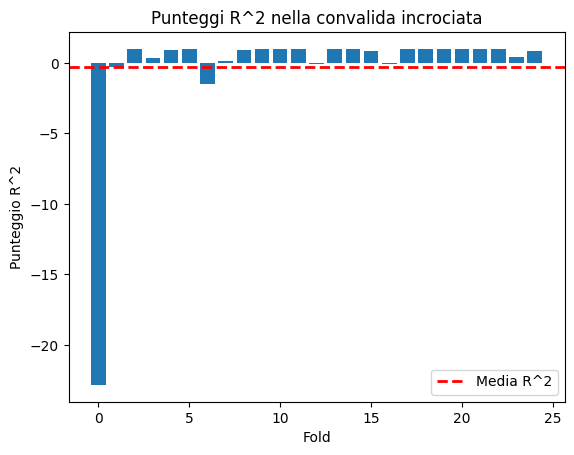

In [65]:
#Validazione dei dati dello stesso dataset con cross validation k-fold (16 fold sono ottimali per una buona validazione)

from sklearn.model_selection import cross_val_score

targets = df_scaled[['k_m2']]
# Esegui la convalida incrociata a k-fold con k=5 (puoi scegliere il valore di k)
scores = cross_val_score(regressor, df_scaled, targets, cv=25, scoring='r2')
# Puoi anche utilizzare 'neg_mean_absolute_error' per MAE o 'neg_root_mean_squared_error' per RMSE

# Calcola la media dei punteggi R^2
mean_r2 = scores.mean()

# Plotta i punteggi R^2 ottenuti in ciascun fold
plt.bar(range(len(scores)), scores)
plt.xlabel('Fold')
plt.ylabel('Punteggio R^2')
plt.title('Punteggi R^2 nella convalida incrociata')
plt.axhline(mean_r2, color='red', linestyle='dashed', linewidth=2, label='Media R^2')
plt.legend()
plt.show()

In [9]:
#Allenamento modello con ElasticNet
#TODO: da sistemare -> VOGLIO SEMPLICEMENTE AGGIUNGERE UN MODELLO DI ALLENAMENTO.
#PUò ESSERE IMPLEMENTATO SINGOLARMENTE QUI, OPPURE TORNARE NELLA PRIMA FASE DI ALLENAMENTO E GENERARE UN CICLO CHE ALLENA I MODELLI PER LO STESSO DATASET
#IN UNA LISTA DI MODELLI, E POI STAMPARE I RISULTATI DI TUTTI I MODELLI IN UN GRAFICO A BARRE


from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

# Crea un'istanza del modello Elastic Net
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)  # Iperparametri alpha e l1_ratio possono essere regolati

# Addestra il modello sui dati di addestramento
elastic_net.fit(features_X_train, targets_X_train)
elastic_net.fit(features_Y_train, targets_Y_train)
elastic_net.fit(features_Z_train, targets_Z_train)

# Fai previsioni con il modello
predictions_elastic_X = elastic_net.predict(features_X_test)
predictions_elastic_Y = elastic_net.predict(features_Y_test)
predictions_elastic_Z = elastic_net.predict(features_Z_test)

print(f"R^2 Kx : {r2_score(targets_X_test, predictions_elastic_X)} ")
print(f"R^2 Ky : {r2_score(targets_Y_test, predictions_elastic_Y)} ")
print(f"R^2 Kz : {r2_score(targets_Z_test, predictions_elastic_Z)} ")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- kz
Feature names seen at fit time, yet now missing:
- kx


Using downloaded and verified file: C:\Users\loris\drd_data\Berea_2d25um_grayscale.raw


ValueError: 'c' argument has 1000000000 elements, which is inconsistent with 'x' and 'y' with size 1000.

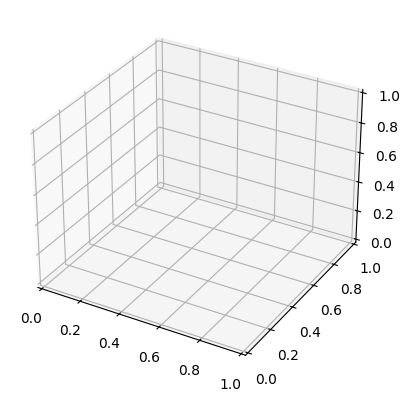

In [10]:
#Qui inizio a caricare il dataset Berea SandStones
#Libreria 'drd' by @Lukas Mosser
import matplotlib.pyplot as plot
from drd.datasets.eleven_sandstones import load_eleven_sandstones

# xarray DataArray with image data
img = load_eleven_sandstones("Berea", "Berea_2d25um_grayscale.raw") 

# Estrai i dati dal dataset
data = img.values

# Crea una griglia 3D per i punti (x, y, z)
x, y, z = img.x, img.y, img.z

# Normalizza i dati in modo che siano compresi tra 0 e 1
norm_data = (data - data.min()) / (data.max() - data.min())

# Crea una figura 3D
figure = plot.figure()
ax = figure.add_subplot(111, projection='3d')

# Plotta i dati in 3D con la colormap
sc = ax.scatter(x, y, z, c=norm_data, cmap='viridis')

# Aggiungi una barra dei colori
cbar = figure.colorbar(sc)


ax = figure.add_subplot(111, projection='3d')

# Plotta i dati in 3D
ax.scatter(x, y, z, c=data, cmap='viridis')  # Puoi scegliere la colormap che preferisci

# Aggiungi etichette agli assi
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



In [ ]:
#Ora vorrei salvare il modello addestrato e riutilizzarlo
import pickle

#Salvo il modello
pickle.dump(model_kx, open('model_kx.pkl', 'wb'))
pickle.dump(model_ky, open('model_ky.pkl', 'wb'))
pickle.dump(model_kz, open('model_kz.pkl', 'wb'))


In [ ]:
#Carico il modello
model_kx = pickle.load(open('model_kx.pkl', 'rb'))
model_ky = pickle.load(open('model_ky.pkl', 'rb'))
model_kz = pickle.load(open('model_kz.pkl', 'rb'))


In [ ]:
#Utilizzo il modello per fare previsioni
#Prendo un esempio dal dataset
example = df_imputed.iloc[0]

#Prendo solo le features
example = example.drop(['kx', 'ky', 'kz'])

#Prendo solo i valori
example = example.values.reshape(1, -1)

#Prendo le previsioni
prediction = model_kx.predict(example)

#Stampo le previsioni
print(f"Previsioni: {prediction}")
